In [6]:
import numpy as np 
import pandas as pd #panel dataframe
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("C:\\Users\\Srushti\\Desktop\\ML\\Titanic-Dataset.csv",encoding='latin-1')

In [8]:
df  #south hampton,

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

In [ ]:
df.head(3)

In [ ]:
df.tail(3)

In [ ]:
#handle data incorrect, duplicate values, outliers , null values, textual data , irrelevant data , heavy positive correlation

In [ ]:
df.columns

In [15]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.isnull().sum()/len(df)*100

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean()) # did this cuz age 177 was a null value- replaced with 0

In [ ]:
df.drop('Cabin' , axis = 1) #not changed permamnently

In [ ]:
df.drop('Cabin',axis = 1, inplace = True)

In [ ]:
plt.title('Embarked count plot')
df['Embarked'].value_counts().plot(kind = "bar")
plt.show()

In [ ]:
df['Embarked']=df['Embarked'].fillna('S') #filled all null values with s

#### Handling Highly+ Correlation values

In [ ]:
sns.heatmap(df.corr(numeric_only = True),annot = True , vmin=-1,vmax=1, cmap='coolwarm')
plt.show()

#### Handling Outliers

PassengerId


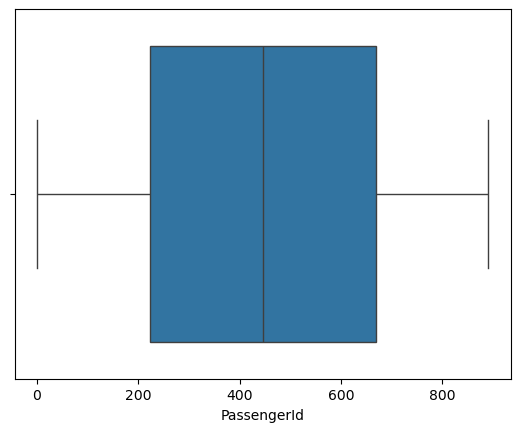

Survived


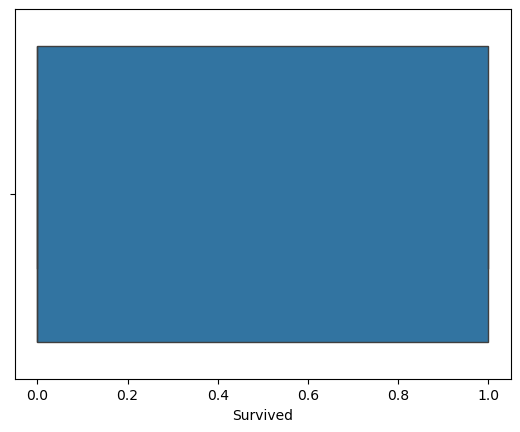

Pclass


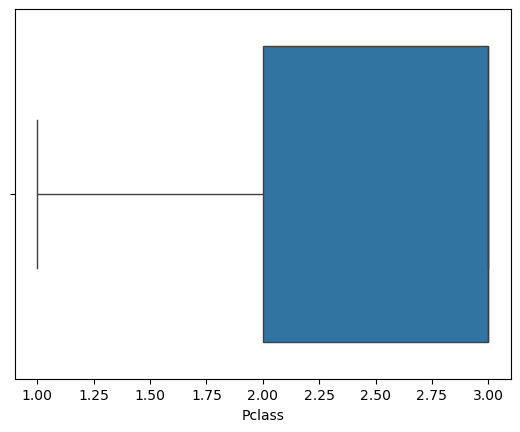

Age


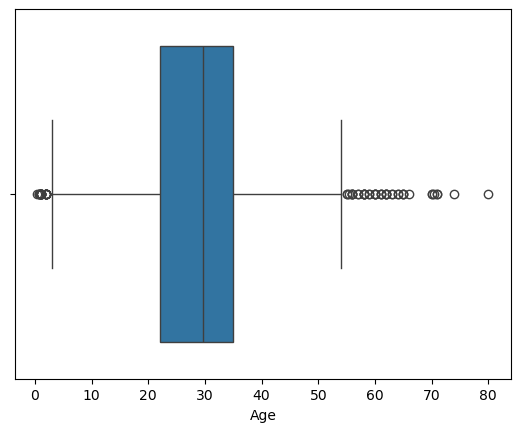

SibSp


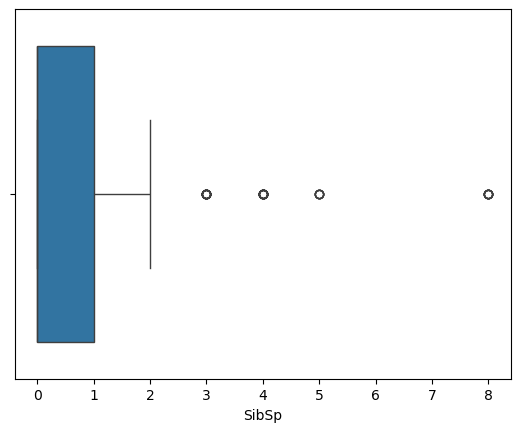

Parch


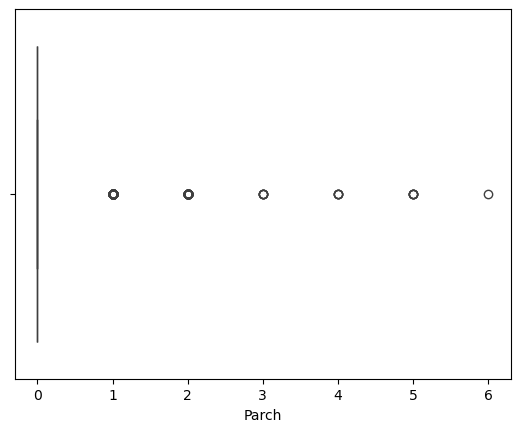

Fare


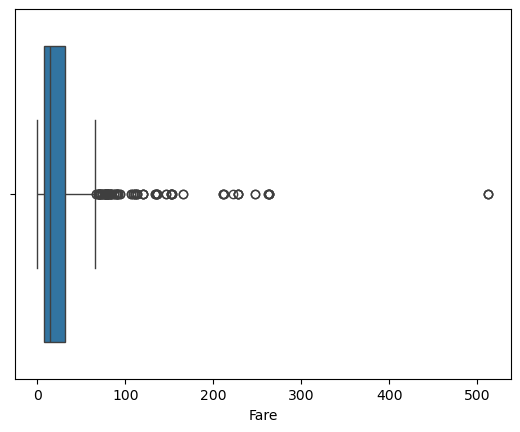

In [89]:
for col_name in df.select_dtypes('number').columns:
    print(col_name)
    sns.boxplot(df,x=col_name)
    plt.show()

In [14]:
q1=df['Fare'].quantile(0.25)
q3=df['Fare'].quantile(0.75)
iqr = q3-q1
lower_whisker =q1-iqr*1.5
upper_whisker =q3+iqr*1.5

In [16]:
df['Fare'][df['Fare']>upper_whisker]=upper_whisker

#### Handling Irregular Data

In [98]:
df.drop(['PassengerId','Name', 'Ticket'] , axis=1,inplace = True)

#### Handling Textual Data

In [101]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,65.6344,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [103]:
pd.get_dummies(df,dtype = int)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,65.6344,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [18]:
df=pd.get_dummies(df,dtype = int,drop_first= True)

#### Input & Output

In [110]:
X = df.drop('Survived' , axis = 1)
Y = df['Survived']

#### Train Test Split

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

#### Apply Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [123]:
Y_pred = lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       117
           1       0.75      0.73      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [126]:
#### Predicting Survival

In [133]:
Pclass=float(input('Please enter Pclass here'))
Age=float(input('Please enter Age here'))
SibSp=float(input('Please enter number of Sibling Spouse here'))
Parch=float(input('Please enter number of Parents Children here'))
Fare=float(input('Please enter fare value here'))
Sex_male=float(input('Enter 1 if gender is male'))
Embarked_Q=float(input('Enter 1 if embarked from Queenstown'))
Embarked_S=float(input('Enter 1 if embarked from Sounth Hampton'))

user_input=np.array([Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S]).reshape(1,-1)
if lr.predict(user_input)==0:
    print('RIP! You wont survive Titanic')
else:
    print('Hooray! You will survive Titanic')

Please enter Pclass here 2
Please enter Age here 40
Please enter number of Sibling Spouse here 0
Please enter number of Parents Children here 1
Please enter fare value here 59
Enter 1 if gender is male 1
Enter 1 if embarked from Queenstown 0
Enter 1 if embarked from Sounth Hampton 0


RIP! You wont survive Titanic
